In [71]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [72]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12280,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19905281.00,19905281.00,False,NaN,1,NaN,NaN,None,2025-08-13T08:38:00.000Z,119888.95,75110319183.52,0.22,0.46,0.92,5.24,-2.16,14.09,17.29,2386423310784.67,58.54,2517668026212.65,None,2025-08-13T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
1,1027,Ethereum,ETH,ethereum,10437,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120708589.99,120708589.99,True,NaN,2,NaN,NaN,None,2025-08-13T08:39:00.000Z,4627.46,65011800003.16,42.97,0.08,7.50,27.84,52.75,82.55,81.17,558574404083.11,13.70,558574404083.11,None,2025-08-13T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00,59308385925.00,99985880506.00,False,NaN,3,NaN,NaN,None,2025-08-13T08:39:00.000Z,3.27,8682242180.65,-0.27,1.44,4.06,11.51,10.58,50.37,31.36,194020518586.69,4.76,327138423278.02,None,2025-08-13T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
3,825,Tether USDt,USDT,tether,141166,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,165024459754.79,167749161112.31,True,NaN,4,NaN,NaN,None,2025-08-13T08:38:00.000Z,1.00,161243127848.48,22.50,-0.01,-0.00,0.00,-0.02,-0.05,-0.02,165016413604.06,4.05,167740982112.44,None,2025-08-13T08:38:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-13 14:10:25.380342
4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139287850.75,139287850.75,False,NaN,5,NaN,NaN,None,2025-08-13T08:39:00.000Z,848.58,3233266901.30,21.58,-0.00,5.29,11.55,20.55,30.35,30.06,118197396187.26,2.90,118197396187.26,None,2025-08-13T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
5,5426,Solana,SOL,solana,968,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,539664555.63,607331115.99,True,NaN,6,525236893.30,104007120555.96,None,2025-08-13T08:38:00.000Z,198.02,11830810000.15,99.02,0.68,12.68,21.17,19.04,36.05,14.85,106864078310.31,2.62,120263373354.13,None,2025-08-13T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
6,3408,USDC,USDC,usd-coin,30472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,66301404726.18,66301404726.18,False,NaN,7,60901219650.23,60884054503.60,None,2025-08-13T08:39:00.000Z,1.00,21027292885.28,18.06,-0.00,-0.02,-0.01,-0.02,-0.02,-0.01,66282717525.16,1.63,66282717525.16,None,2025-08-13T08:39:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-13 14:10:25.380342
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150498216383.71,150498216383.71,True,NaN,8,NaN,NaN,None,2025-08-13T08:39:00.000Z,0.25,3853318710.49,62.52,4.35,11.58,24.80,21.17,41.03,9.85,37536909728.74,0.92,37536909728.74,None,2025-08-13T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
8,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94691332700.04,94691338567.68,True,NaN,9,71659659264.00,25472962916.08,None,2025-08-13T08:39:00.000Z,0.36,1293298098.76,21.49,-0.21,2.40,6.69,17.

In [74]:

def api_runner():
    #global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df


    if not os.path.exists(r"C:\Users\anami\Documents\Projects\API.csv"):
        df.to_csv(r"C:\Users\anami\Documents\Projects\API.csv", header = 'column_names')
    else:
        df.to_csv(r"C:\Users\anami\Documents\Projects\API.csv", mode = 'a', header = False)
        

In [75]:
import os
from time import time
from time import sleep

for i in range(10):
    api_runner()
    print("api run completed")
    sleep(2)
exit()

api run completed
api run completed
api run completed
api run completed
api run completed
api run completed


KeyboardInterrupt: 

In [83]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12280,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19905281.00,19905281.00,False,NaN,1,NaN,NaN,None,2025-08-13T08:38:00.000Z,119888.95,75110319183.52,0.22,0.46,0.92,5.24,-2.16,14.09,17.29,2386423310784.67,58.54,2517668026212.65,None,2025-08-13T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
1,1027,Ethereum,ETH,ethereum,10437,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120708589.99,120708589.99,True,NaN,2,NaN,NaN,None,2025-08-13T08:39:00.000Z,4627.46,65011800003.16,42.97,0.08,7.50,27.84,52.75,82.55,81.17,558574404083.11,13.70,558574404083.11,None,2025-08-13T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00,59308385925.00,99985880506.00,False,NaN,3,NaN,NaN,None,2025-08-13T08:39:00.000Z,3.27,8682242180.65,-0.27,1.44,4.06,11.51,10.58,50.37,31.36,194020518586.69,4.76,327138423278.02,None,2025-08-13T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
3,825,Tether USDt,USDT,tether,141166,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,165024459754.79,167749161112.31,True,NaN,4,NaN,NaN,None,2025-08-13T08:38:00.000Z,1.00,161243127848.48,22.50,-0.01,-0.00,0.00,-0.02,-0.05,-0.02,165016413604.06,4.05,167740982112.44,None,2025-08-13T08:38:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-13 14:10:25.380342
4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139287850.75,139287850.75,False,NaN,5,NaN,NaN,None,2025-08-13T08:39:00.000Z,848.58,3233266901.30,21.58,-0.00,5.29,11.55,20.55,30.35,30.06,118197396187.26,2.90,118197396187.26,None,2025-08-13T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
5,5426,Solana,SOL,solana,968,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,539664555.63,607331115.99,True,NaN,6,525236893.30,104007120555.96,None,2025-08-13T08:38:00.000Z,198.02,11830810000.15,99.02,0.68,12.68,21.17,19.04,36.05,14.85,106864078310.31,2.62,120263373354.13,None,2025-08-13T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
6,3408,USDC,USDC,usd-coin,30472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,66301404726.18,66301404726.18,False,NaN,7,60901219650.23,60884054503.60,None,2025-08-13T08:39:00.000Z,1.00,21027292885.28,18.06,-0.00,-0.02,-0.01,-0.02,-0.02,-0.01,66282717525.16,1.63,66282717525.16,None,2025-08-13T08:39:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-13 14:10:25.380342
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150498216383.71,150498216383.71,True,NaN,8,NaN,NaN,None,2025-08-13T08:39:00.000Z,0.25,3853318710.49,62.52,4.35,11.58,24.80,21.17,41.03,9.85,37536909728.74,0.92,37536909728.74,None,2025-08-13T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:10:25.380342
8,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94691332700.04,94691338567.68,True,NaN,9,71659659264.00,25472962916.08,None,2025-08-13T08:39:00.000Z,0.36,1293298098.76,21.49,-0.21,2.40,6.69,17.

In [85]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [87]:
df3 = df.groupby('name')[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Avalanche,1.02,8.30,12.79,14.64,29.70,3.35
BNB,-0.00,5.29,11.55,20.55,30.35,30.06
Bitcoin,0.46,0.92,5.24,-2.16,14.09,17.29
Bitcoin Cash,0.54,2.97,8.27,17.44,40.12,53.69
Cardano,1.81,11.60,19.90,15.32,36.43,11.10
Chainlink,0.09,9.96,43.20,46.80,77.89,42.67
Dogecoin,4.35,11.58,24.80,21.17,41.03,9.85
Ethena USDe,-0.02,0.00,0.01,0.02,-0.00,0.02
Ethereum,0.08,7.50,27.84,52.75,82.55,81.17


In [89]:
df4 = df3.stack()
df4

name                                      
Avalanche     quote.USD.percent_change_1h     1.02
              quote.USD.percent_change_24h    8.30
              quote.USD.percent_change_7d    12.79
              quote.USD.percent_change_30d   14.64
              quote.USD.percent_change_60d   29.70
              quote.USD.percent_change_90d    3.35
BNB           quote.USD.percent_change_1h    -0.00
              quote.USD.percent_change_24h    5.29
              quote.USD.percent_change_7d    11.55
              quote.USD.percent_change_30d   20.55
              quote.USD.percent_change_60d   30.35
              quote.USD.percent_change_90d   30.06
Bitcoin       quote.USD.percent_change_1h     0.46
              quote.USD.percent_change_24h    0.92
              quote.USD.percent_change_7d     5.24
              quote.USD.percent_change_30d   -2.16
              quote.USD.percent_change_60d   14.09
              quote.USD.percent_change_90d   17.29
Bitcoin Cash  quote.USD.percent_change_

In [91]:
df5 = df4.to_frame(name = 'values')
df5.reset_index(inplace = True)
df5

,name,level_1,values
0,Avalanche,quote.USD.percent_change_1h,1.02
1,Avalanche,quote.USD.percent_change_24h,8.30
2,Avalanche,quote.USD.percent_change_7d,12.79
3,Avalanche,quote.USD.percent_change_30d,14.64
4,Avalanche,quote.USD.percent_change_60d,29.70
5,Avalanche,quote.USD.percent_change_90d,3.35
6,BNB,quote.USD.percent_change_1h,-0.00
7,BNB,quote.USD.percent_change_24h,5.29
8,BNB,quote.USD.percent_change_7d,11.55
9,BNB,quote.USD.percent_change_30d,20.55


In [93]:
df5.rename(columns = {'level_1' : 'percent_change'}, inplace = True)

In [123]:
df5['percent_change'] = df5['percent_change'].str.lstrip('quote.USD.percent_change_')

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

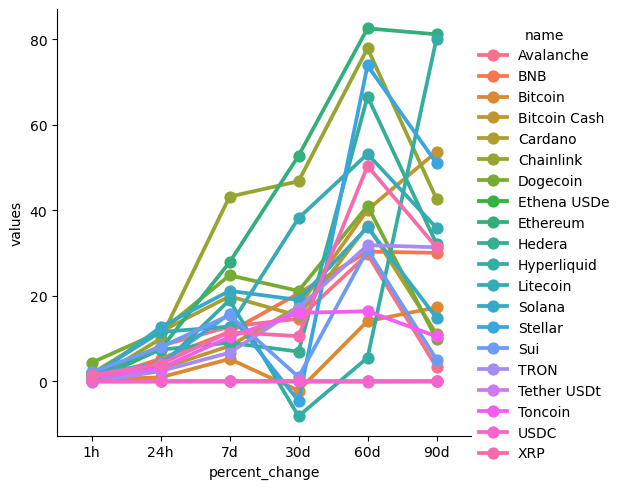

In [127]:
sns.catplot(x = 'percent_change', y = 'values', hue= 'name', data= df5, kind = 'point')
